In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Power-law fit function
def power_law(N, lambda_inf, A, gamma):
    return lambda_inf + A * N**(-gamma)

def plot_le_gamma_from_file(filename, pdf_prefix="results"):
    """
    Load LE + gamma results from npz file and plot:
      1. λ vs p for multiple N (legend shows N sizes)
      2. γ vs p (finite-size scaling)
      3. R^2 of power-law scaling fit vs p
    Each plot is saved as a separate PDF.
    """

    # Load data
    data = np.load(filename, allow_pickle=True)
    p_values = data["p_values"]
    N_list = data["N_list"]
    all_lambdas = data["all_lambdas"]
    gamma_values = data["gamma_values"]

    sns.set(style="whitegrid")
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10
    })

    # --- Plot λ vs p for multiple N with legend showing N sizes ---
    plt.figure(figsize=(9, 5))
    for i, N in enumerate(N_list):
        plt.plot(p_values, all_lambdas[i], marker='o', label=f'N = {N}')
    plt.xlabel("Connection Probability p")
    plt.ylabel(r"Lyapunov Exponent $\lambda_{\infty}$")
    plt.legend(title="System Size N")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_lambda.pdf")
    plt.show()
    plt.close()

    # --- Plot γ vs p ---
    plt.figure(figsize=(9, 5))
    plt.plot(p_values, gamma_values, marker='o', color='darkgreen')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Convergence Exponent γ")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_gamma.pdf")
    plt.show()
    plt.close()

    # --- Compute and plot R^2 of power-law fit ---
    r2_values = []
    for i, p in enumerate(p_values):
        lambdas_p = np.array([lambdas[i] for lambdas in all_lambdas])
        try:
            popt, _ = curve_fit(power_law, N_list, lambdas_p,
                                bounds=([-1, -10, 0.01], [1, 10, 5]))
            residuals = lambdas_p - power_law(np.array(N_list), *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((lambdas_p - np.mean(lambdas_p))**2)
            r2 = 1 - ss_res / ss_tot
        except Exception:
            r2 = np.nan
        r2_values.append(r2)

    plt.figure(figsize=(9,5))
    plt.plot(p_values, r2_values, marker='o', linestyle='-', color='purple')
    plt.xlabel("Connection Probability p")
    plt.ylabel(r"$R^2$ of Power-Law Fit")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_r2.pdf")
    plt.show()
    plt.close()

    print(f"Plots saved as {pdf_prefix}_lambda.pdf, {pdf_prefix}_gamma.pdf, and {pdf_prefix}_r2.pdf")


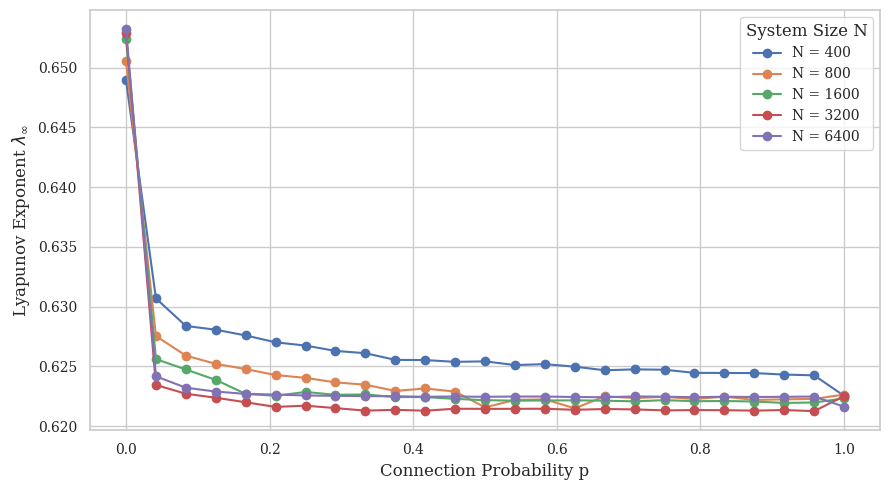

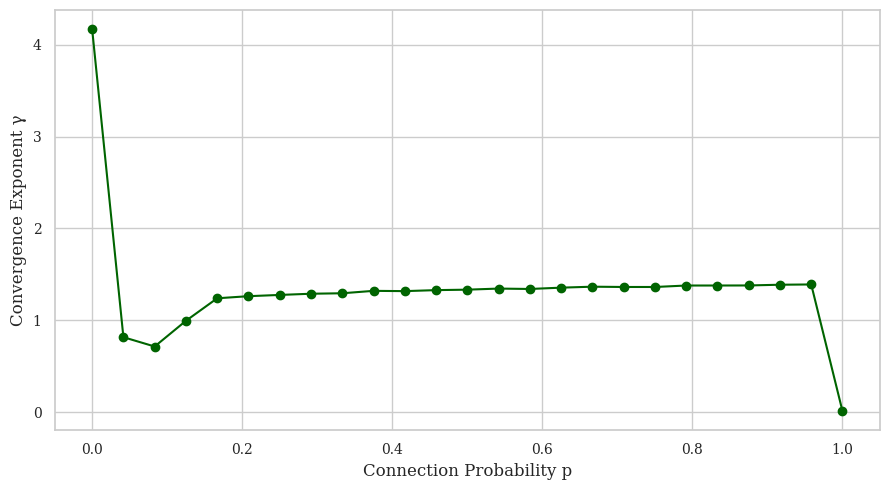

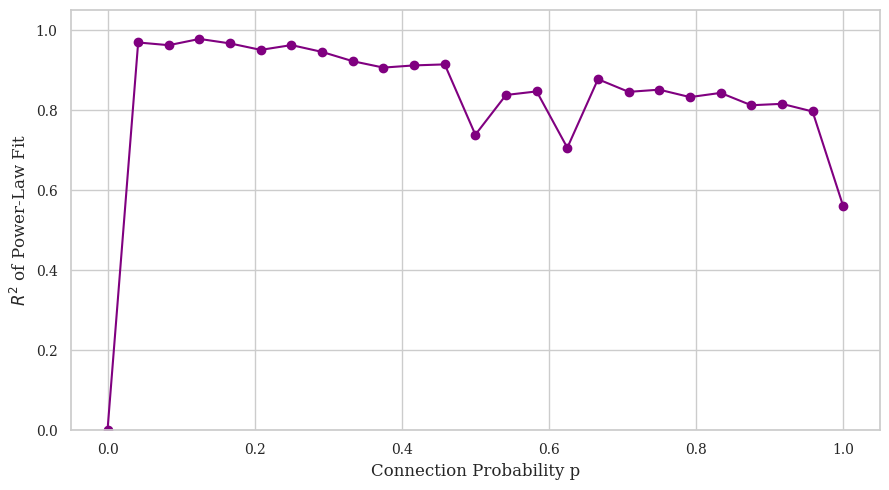

Plots saved as eps03_6400_lambda.pdf, eps03_6400_gamma.pdf, and eps03_6400_r2.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps03_6400.npz", pdf_prefix="eps03_6400")


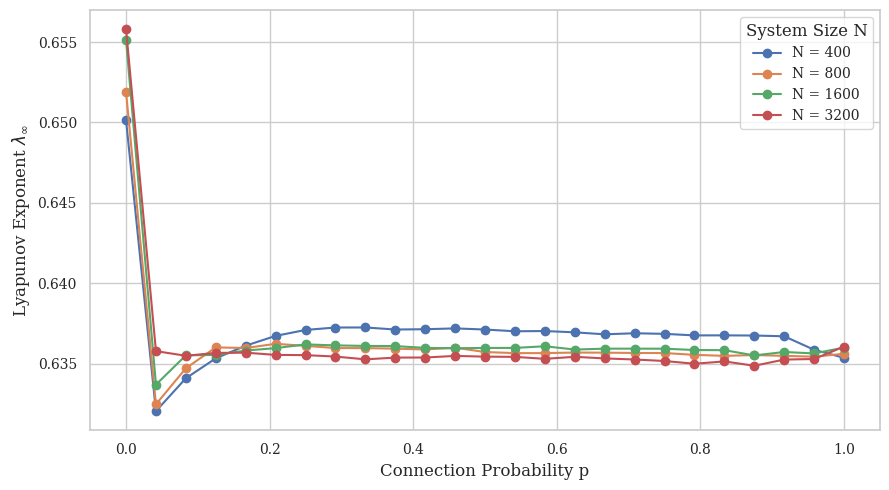

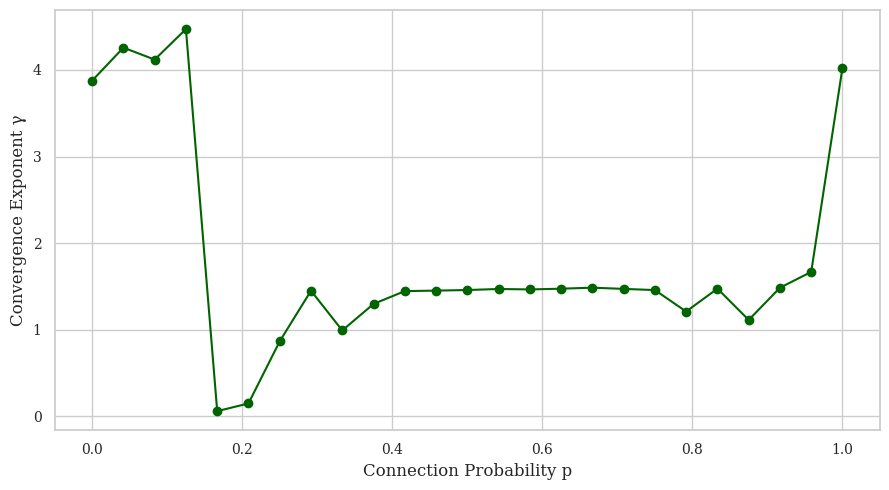

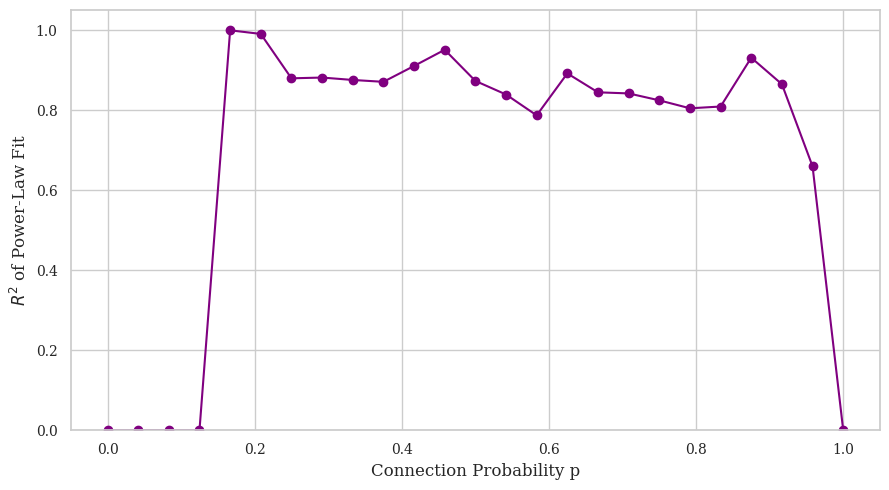

Plots saved as eps043_lambda.pdf, eps043_gamma.pdf, and eps043_r2.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps043.npz", pdf_prefix="eps043")

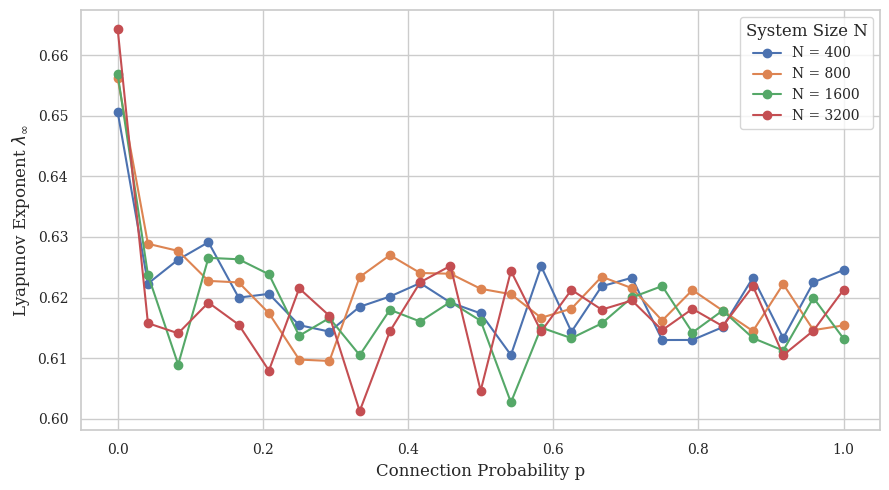

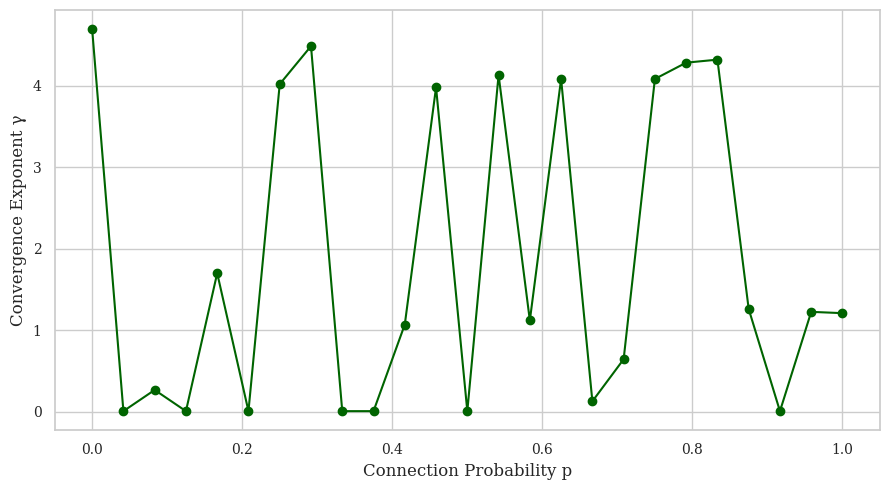

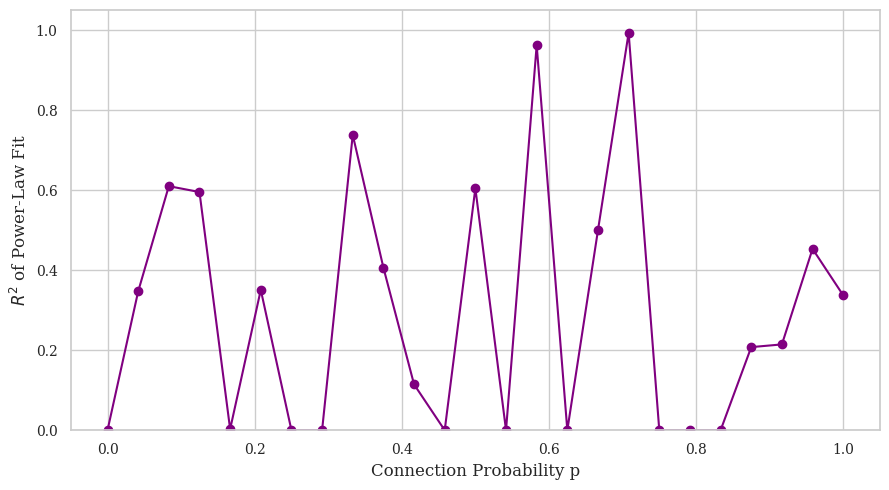

Plots saved as eps06_lambda.pdf, eps06_gamma.pdf, and eps06_r2.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps06.npz", pdf_prefix="eps06")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Power-law fit function
def power_law(N, lambda_inf, A, gamma):
    return lambda_inf + A * N**(-gamma)

def plot_r2_vs_p_multiple_eps(filenames, eps_values, pdf_filename="r2_vs_p_multiple_eps.pdf"):
    """
    Plot R^2 of power-law finite-size scaling vs p for multiple epsilon values.

    Parameters
    ----------
    filenames : list of str
        List of .npz filenames containing 'N_list', 'all_lambdas', and 'p_values'.
    eps_values : list of float
        Epsilon values corresponding to each file (same order as filenames).
    pdf_filename : str
        Name of the PDF file to save the plot.
    """
    if len(filenames) != len(eps_values):
        raise ValueError("filenames and eps_values must have the same length")

    sns.set(style="whitegrid")
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10
    })

    plt.figure(figsize=(10, 6))

    # Loop over files
    for file, eps in zip(filenames, eps_values):
        data = np.load(file, allow_pickle=True)
        N_list = data["N_list"]
        p_values = data["p_values"]
        all_lambdas = data["all_lambdas"]

        r2_values = []

        # Compute R² for each p
        for i, p in enumerate(p_values):
            lambdas_p = np.array([l[i] for l in all_lambdas])
            try:
                popt, _ = curve_fit(power_law, N_list, lambdas_p,
                                    bounds=([-1, -10, 0.01], [1, 10, 5]))
                residuals = lambdas_p - power_law(np.array(N_list), *popt)
                ss_res = np.sum(residuals**2)
                ss_tot = np.sum((lambdas_p - np.mean(lambdas_p))**2)
                r2 = 1 - ss_res / ss_tot
            except Exception:
                r2 = np.nan
            r2_values.append(r2)

        # Plot this epsilon curve
        plt.plot(p_values, r2_values, marker='o', linestyle='-', alpha=0.9, label=fr"$\epsilon = {eps}$")

    plt.xlabel("Connection Probability p", fontsize=14, fontweight='bold')
    plt.ylabel(r"$R^2$ of Power-Law Fit", fontsize=14, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title=r"Epsilon values")
    plt.tight_layout()
    plt.savefig(pdf_filename, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()
    print(f"R^2 plot saved as {pdf_filename}")


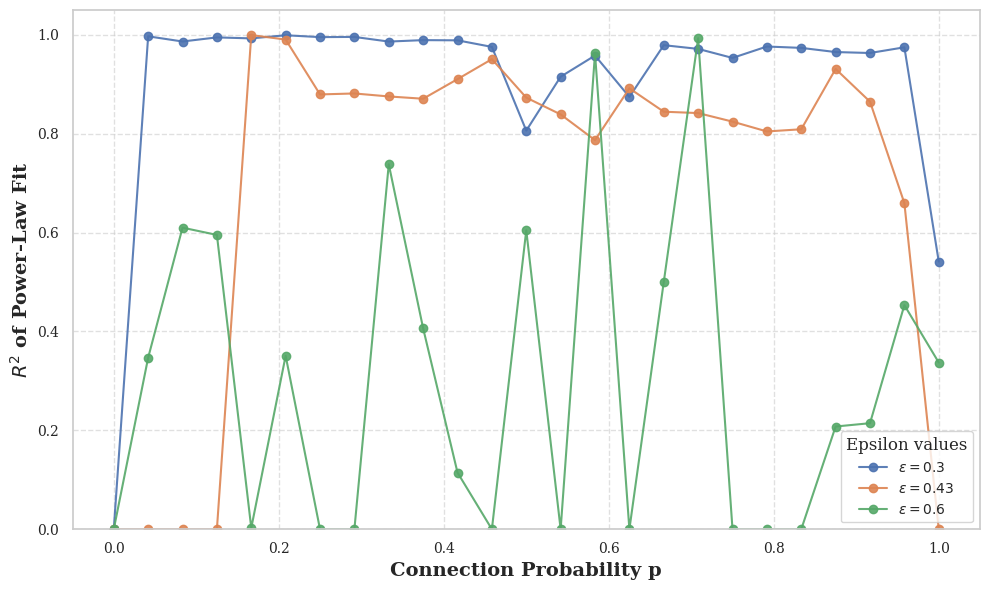

R^2 plot saved as r2_vs_p_all_eps.pdf


In [ ]:
filenames = ["le_gamma_results_eps03.npz", "le_gamma_results_eps043.npz", "le_gamma_results_eps06.npz"]
eps_values = [0.3, 0.43, 0.6]

plot_r2_vs_p_multiple_eps(filenames, eps_values, pdf_filename="r2_vs_p_all_eps.pdf")
